# Classification

In [131]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [77]:
iris = load_iris(as_frame=True)
X_iris = iris.data[['petal length (cm)','petal width (cm)']]
y_iris = iris.target

In [78]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

### Visualizing tree

In [79]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(
        tree_clf,
        out_file=str("images/decision_trees/iris_tree_class.dot"),  # path differs in the book
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

graphviz.Source.from_file("images/decision_trees/iris_tree_class.dot")

[2.44999999 1.75      ]


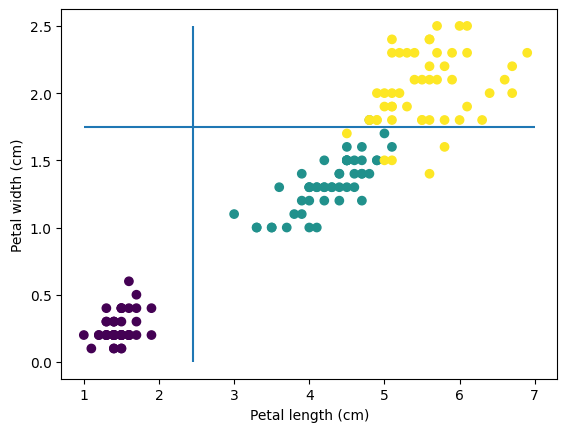

In [152]:
tree_clf_deep = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deep.fit(X_iris, y_iris)
thresholds = tree_clf_deep.tree_.threshold[[0,2]]
print(thresholds)

plt.scatter(X_iris['petal length (cm)'],X_iris['petal width (cm)'],c=y_iris)
plt.xlabel("Petal length (cm)")
plt.ylabel('Petal width (cm)')

plt.vlines(thresholds[0], ymin=0, ymax=2.5)
plt.hlines(thresholds[1], xmin=1, xmax=7)

### Many more attributes available

To make predictions, after traversing, the classifier outputs the ratio of training instances of each class at the that node.

In [81]:
print(tree_clf.predict_proba([[6,1.5]]).round(3))
print(tree_clf.predict([[6,1.5]]))
tree_clf.score(X_iris, y_iris)

[[0.    0.907 0.093]]
[1]


d:\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


You can also find valuable information about the constructed tree from .tree_ attribute.

### Hyperparameters

You can choose to use gini impurity or entropy by setting the 'criterion' hyperparameter in the classifier.

You can regularize the model by tuning the max and min hyperparameters.

# Regression

In [94]:
import numpy as np

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200,1)

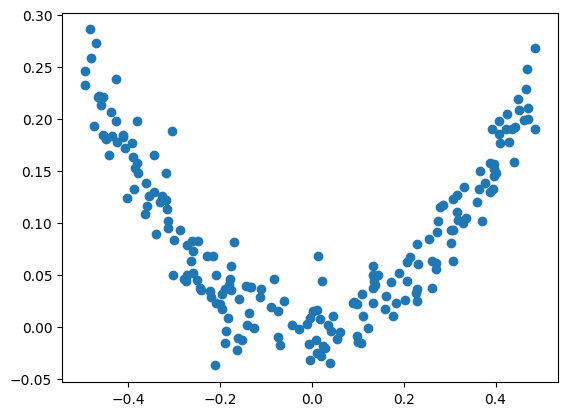

In [95]:
plt.scatter(X_quad, y_quad)

In [96]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

### Visualizing tree

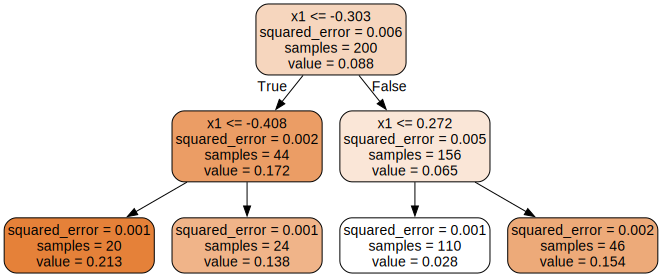

In [97]:
export_graphviz(
        tree_reg,
        out_file=str("images/decision_trees/iris_tree_reg.dot"),  # path differs in the book
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

graphviz.Source.from_file("images/decision_trees/iris_tree_reg.dot")

In [91]:
tree_reg.score(X_quad, y_quad)

0.7966018355059642

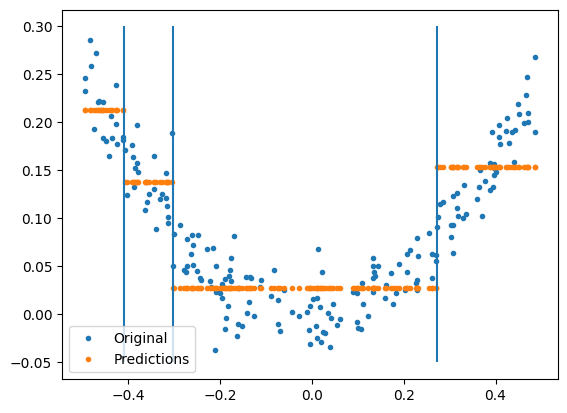

In [127]:
plt.plot(X_quad, y_quad, '.', label = 'Original')
plt.plot(X_quad, tree_reg.predict(X_quad), '.', label = "Predictions")
plt.vlines(tree_reg.tree_.threshold[[0,1,4]], ymin=-0.05, ymax=0.30)
plt.legend()